<a href="https://colab.research.google.com/github/JhulianaM/Mammography/blob/master/pruTransferEDSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install kaggle

In [2]:
from google.colab import files
files.upload()  # Sube el archivo kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d kmader/mias-mammography
!unzip mias-mammography.zip -d mias

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/kmader/mias-mammography
License(s): other
100% 311M/312M [00:03<00:00, 123MB/s] 
100% 312M/312M [00:03<00:00, 90.1MB/s]
Archive:  mias-mammography.zip
  inflating: mias/Info.txt           
  inflating: mias/all-mias.tar.gz    
  inflating: mias/all-mias/Info.txt  
  inflating: mias/all-mias/Licence.txt  
  inflating: mias/all-mias/README    
  inflating: mias/all-mias/mdb001.pgm  
  inflating: mias/all-mias/mdb002.pgm  
  inflating: mias/all-mias/mdb003.pgm  
  inflating: mias/all-mias/mdb004.pgm  
  inflating: mias/all-mias/mdb005.pgm  
  inflating: mias/all-mias/mdb006.pgm  
  inflating: mias/all-mias/mdb007.pgm  
  inflating: mias/all-mias/mdb008.pgm  
  inflating: mias/all-mias/mdb009.pgm  
  inflating: mias/all-mias/mdb010.pgm  
  inflating: mias/all-mias/mdb011.pgm  
  inflating: mias/all-mias/mdb012.pgm  
  inflating: mias/all-mias/mdb013.pgm  
  inflating: mias/all-mias/mdb014.pgm  
  inflating: mias

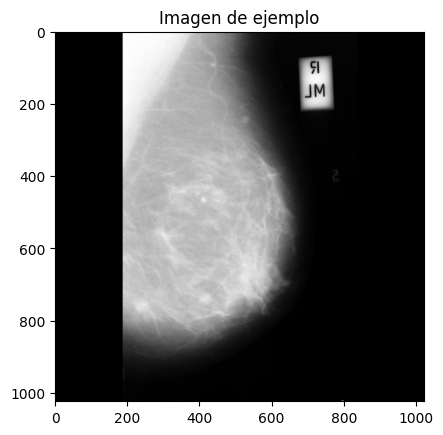

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Directorio de imágenes
data_dir = "mias/all-mias/"

# Cargar imágenes
# Crear una lista con las img en escala de grises
images = []
for file_name in os.listdir(data_dir):
    if file_name.endswith('.pgm'):
        img_path = os.path.join(data_dir, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        images.append(img)

# Visualizar una imagen de ejemplo
plt.imshow(images[0], cmap='gray')
plt.title("Imagen de ejemplo")
plt.show()

# Normalización y preparación
images = np.array(images) #convertimos en arreglo
images = images.astype('float32') / 255.0

In [5]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Descargar y cargar el modelo EDSR preentrenado
!git clone https://github.com/Saafke/EDSR_Tensorflow.git
%cd EDSR_Tensorflow

Cloning into 'EDSR_Tensorflow'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 149 (delta 1), reused 0 (delta 0), pack-reused 143
Receiving objects: 100% (149/149), 162.50 MiB | 32.97 MiB/s, done.
Resolving deltas: 100% (77/77), done.
/content/EDSR_Tensorflow/EDSR_Tensorflow


In [10]:
import tensorflow as tf

def load_pb_model(model_path):
    with tf.io.gfile.GFile(model_path, "rb") as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())
    with tf.compat.v1.Session(graph=tf.Graph()) as sess:
        tf.import_graph_def(graph_def, name="")
        return sess

model_path = '/content/EDSR_Tensorflow/models/EDSR_x4.pb'
session = load_pb_model(model_path)

# Inspeccionar más detalles de cada nodo
for op in session.graph.get_operations():
    print(f"Op name: {op.name}")
    print(f"Op type: {op.type}")
    for tensor in op.outputs:
        print(f"Tensor: {tensor.name}")
    print("")

# Usar esto para identificar los nombres correctos de los tensores de entrada y salida


Op name: NCHW_output/perm
Op type: Const
Tensor: NCHW_output/perm:0

Op name: mul_31/y
Op type: Const
Tensor: mul_31/y:0

Op name: mul_30/y
Op type: Const
Tensor: mul_30/y:0

Op name: mul_29/y
Op type: Const
Tensor: mul_29/y:0

Op name: mul_28/y
Op type: Const
Tensor: mul_28/y:0

Op name: mul_27/y
Op type: Const
Tensor: mul_27/y:0

Op name: mul_26/y
Op type: Const
Tensor: mul_26/y:0

Op name: mul_25/y
Op type: Const
Tensor: mul_25/y:0

Op name: mul_24/y
Op type: Const
Tensor: mul_24/y:0

Op name: mul_23/y
Op type: Const
Tensor: mul_23/y:0

Op name: mul_22/y
Op type: Const
Tensor: mul_22/y:0

Op name: mul_21/y
Op type: Const
Tensor: mul_21/y:0

Op name: mul_20/y
Op type: Const
Tensor: mul_20/y:0

Op name: mul_19/y
Op type: Const
Tensor: mul_19/y:0

Op name: mul_18/y
Op type: Const
Tensor: mul_18/y:0

Op name: mul_17/y
Op type: Const
Tensor: mul_17/y:0

Op name: mul_16/y
Op type: Const
Tensor: mul_16/y:0

Op name: mul_15/y
Op type: Const
Tensor: mul_15/y:0

Op name: mul_14/y
Op type: Con

In [19]:
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity as compare_ssim

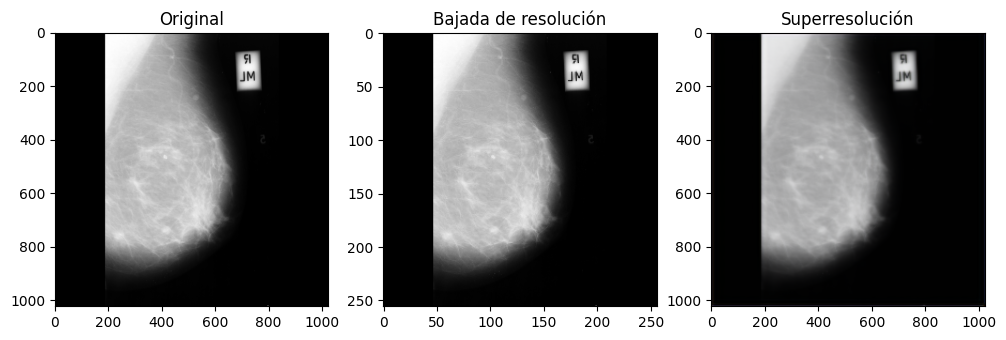

<ipython-input-20-733c2ce2f08a>:83: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_value = compare_psnr(original_img, superres_img_gray)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


Imagen 1 - PSNR: 8.21, SSIM: 0.5174


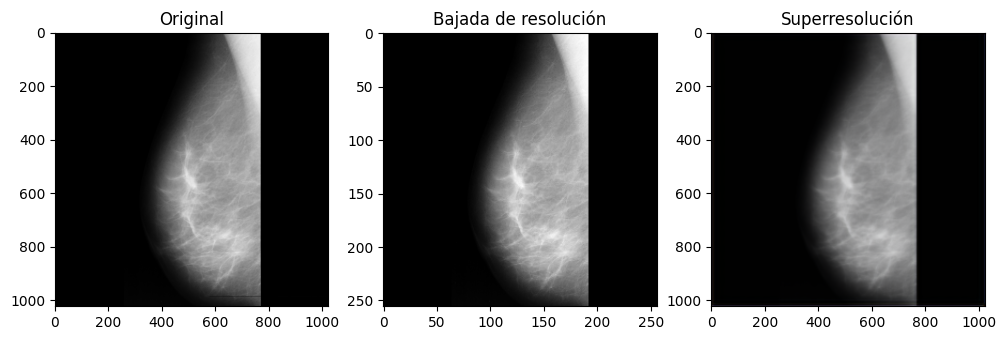

Imagen 2 - PSNR: 10.51, SSIM: 0.6233


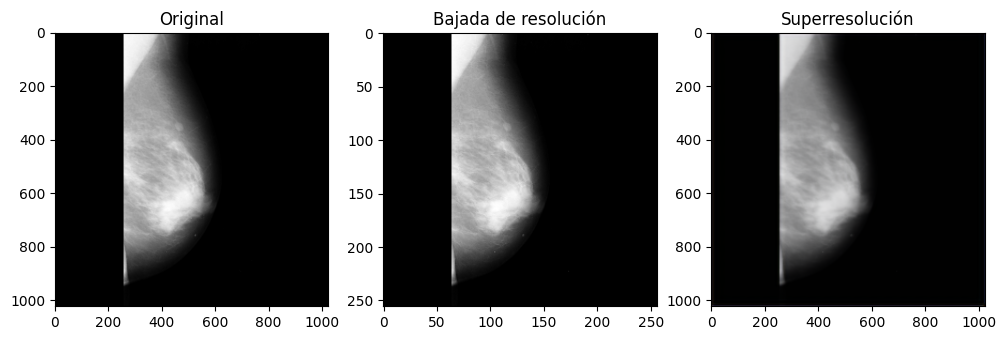

Imagen 3 - PSNR: 11.28, SSIM: 0.7330


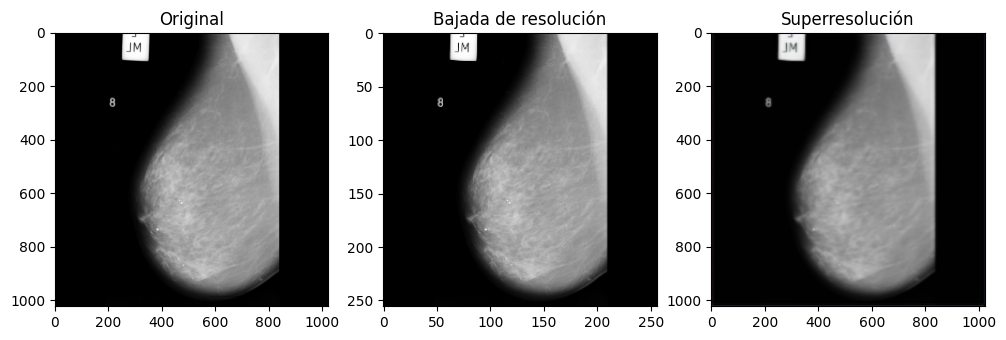

Imagen 4 - PSNR: 8.50, SSIM: 0.5501


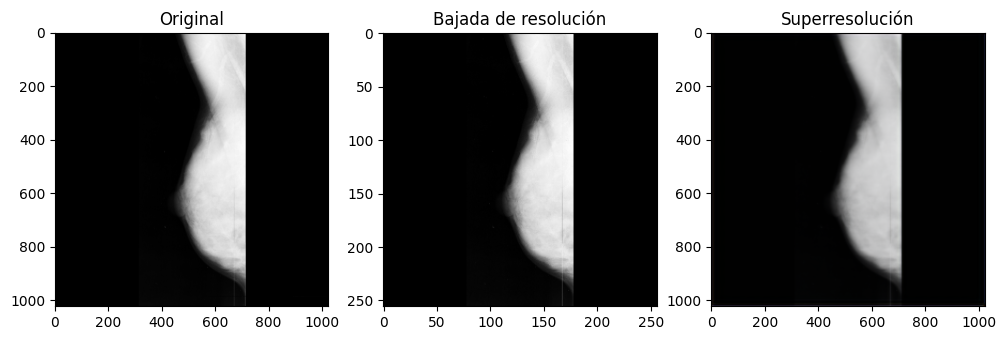

Imagen 5 - PSNR: 10.41, SSIM: 0.7442
PSNR promedio: 9.78, SSIM promedio: 0.6336


In [20]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

def load_pb_model(model_path):
    with tf.io.gfile.GFile(model_path, "rb") as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())
    session = tf.compat.v1.Session(graph=tf.Graph())
    with session.graph.as_default():
        tf.import_graph_def(graph_def, name="")
    return session

# Cargar el modelo EDSR x4
model_path = '/content/EDSR_Tensorflow/models/EDSR_x4.pb'
session = load_pb_model(model_path)

# Obtener el grafo y las operaciones de entrada y salida
graph = session.graph
input_tensor = graph.get_tensor_by_name("IteratorGetNext:0")
output_tensor = graph.get_tensor_by_name("NCHW_output:0")

# Directorio de imágenes
data_dir = "/content/mias/all-mias"

# Cargar imágenes
images = []
for file_name in os.listdir(data_dir):
    if file_name.endswith('.pgm'):
        img_path = os.path.join(data_dir, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        images.append(img)

# Normalización y preparación
images = np.array(images)
images = images.astype('float32') / 255.0

# Convertir imágenes en escala de grises a imágenes RGB
val_images = images[:10]
val_images_rgb = [np.stack((img,)*3, axis=-1) for img in val_images]

# Realizar la bajada de resolución
val_images_resized = [cv2.resize(img, (img.shape[1]//4, img.shape[0]//4)) for img in val_images_rgb]

# Convertir las imágenes a formato de tensor
val_images_resized = np.array(val_images_resized)

# Realizar la inferencia
predicted_images = []
for img in val_images_resized:
    img = np.expand_dims(img, axis=0)  # Añadir la dimensión de batch
    output_img = session.run(output_tensor, feed_dict={input_tensor: img})
    predicted_images.append(output_img[0])  # Quitar la dimensión de batch

# Visualizar las imágenes originales y mejoradas y calcular PSNR y SSIM
psnr_values = []
ssim_values = []

# Visualizar las imágenes originales y mejoradas
for i in range(5):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title('Original')
    plt.imshow(val_images[i], cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title('Bajada de resolución')
    plt.imshow(cv2.cvtColor(val_images_resized[i], cv2.COLOR_BGR2GRAY), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title('Superresolución')
    superres_img = np.transpose(predicted_images[i], (1, 2, 0))  # Reordenar dimensiones
    plt.imshow(superres_img, cmap='gray')
    #plt.imshow(cv2.cvtColor(predicted_images[i], cv2.COLOR_BGR2GRAY), cmap='gray')
    plt.show()

     # Calcular PSNR y SSIM
    original_img = (val_images[i] * 255).astype(np.uint8)
    superres_img_gray = cv2.cvtColor(superres_img, cv2.COLOR_BGR2GRAY)

    psnr_value = compare_psnr(original_img, superres_img_gray)
    ssim_value = compare_ssim(original_img, superres_img_gray)

    psnr_values.append(psnr_value)
    ssim_values.append(ssim_value)

    print(f'Imagen {i+1} - PSNR: {psnr_value:.2f}, SSIM: {ssim_value:.4f}')

# Mostrar los valores promedio de PSNR y SSIM
average_psnr = np.mean(psnr_values)
average_ssim = np.mean(ssim_values)
print(f'PSNR promedio: {average_psnr:.2f}, SSIM promedio: {average_ssim:.4f}')

x2 EDSR base imagen 1024

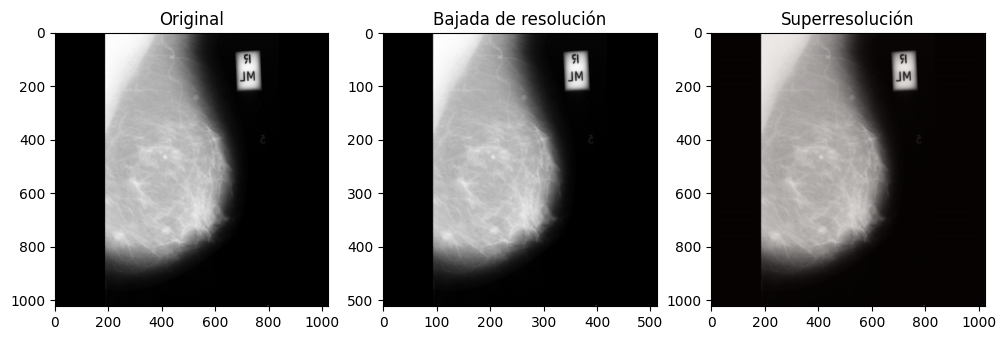

<ipython-input-27-5dca09a116e0>:83: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_value = compare_psnr(original_img, superres_img_gray)


Imagen 1 - PSNR: 8.21, SSIM: 0.5179


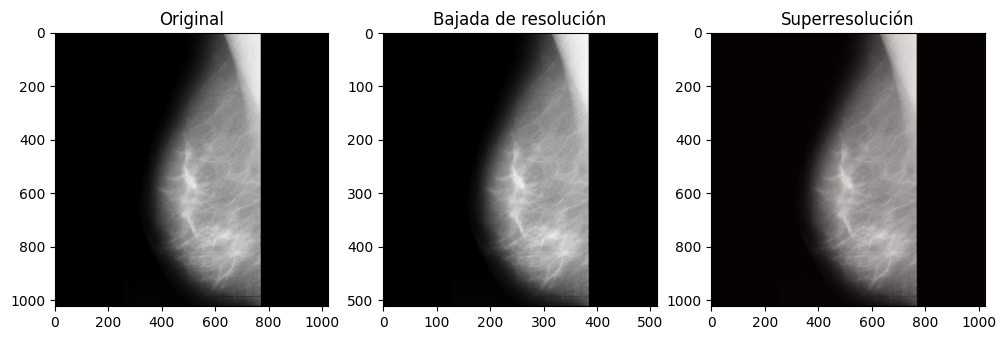

Imagen 2 - PSNR: 10.51, SSIM: 0.6235


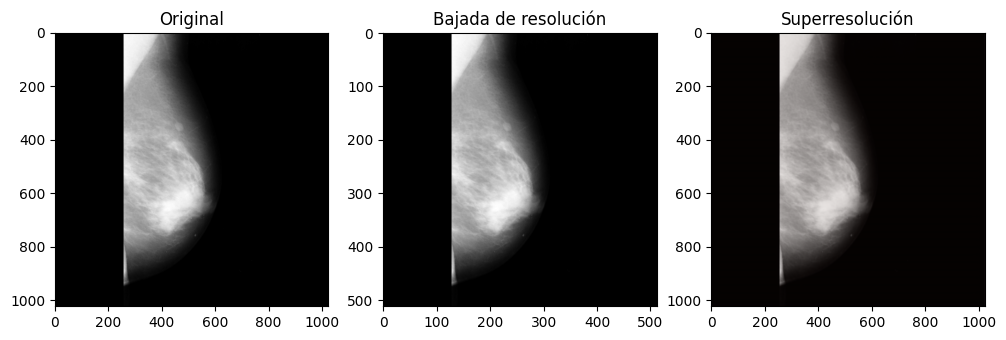

Imagen 3 - PSNR: 11.28, SSIM: 0.7332


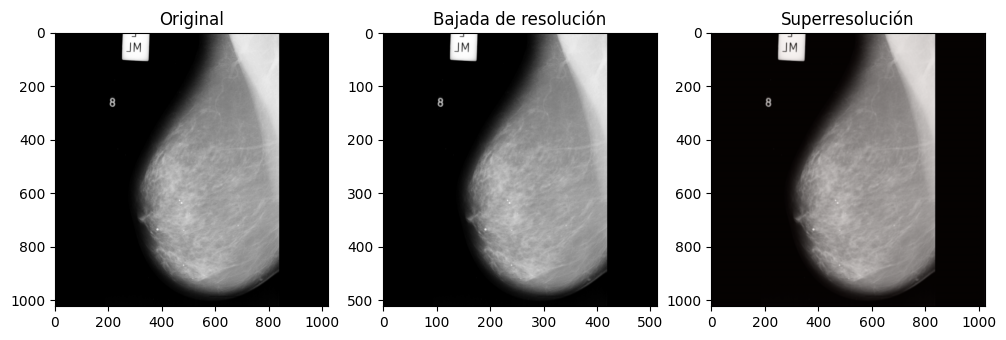

Imagen 4 - PSNR: 8.50, SSIM: 0.5502


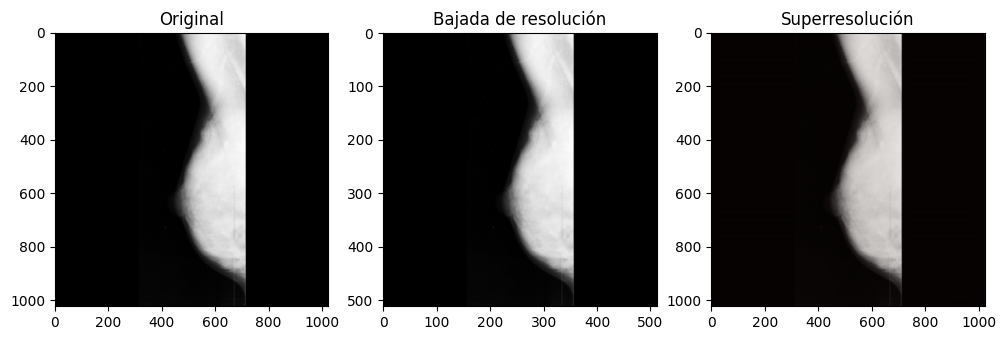

Imagen 5 - PSNR: 10.41, SSIM: 0.7447
PSNR promedio: 9.78, SSIM promedio: 0.6339


In [27]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

def load_pb_model(model_path):
    with tf.io.gfile.GFile(model_path, "rb") as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())
    session = tf.compat.v1.Session(graph=tf.Graph())
    with session.graph.as_default():
        tf.import_graph_def(graph_def, name="")
    return session

# Cargar el modelo EDSR x4
model_path = '/content/EDSR_Tensorflow/models/EDSR_x2.pb'
session = load_pb_model(model_path)

# Obtener el grafo y las operaciones de entrada y salida
graph = session.graph
input_tensor = graph.get_tensor_by_name("IteratorGetNext:0")
output_tensor = graph.get_tensor_by_name("NCHW_output:0")

# Directorio de imágenes
data_dir = "/content/mias/all-mias"

# Cargar imágenes
images = []
for file_name in os.listdir(data_dir):
    if file_name.endswith('.pgm'):
        img_path = os.path.join(data_dir, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        images.append(img)

# Normalización y preparación
images = np.array(images)
images = images.astype('float32') / 255.0

# Convertir imágenes en escala de grises a imágenes RGB
val_images = images[:10]
val_images_rgb = [np.stack((img,)*3, axis=-1) for img in val_images]

# Realizar la bajada de resolución
val_images_resized = [cv2.resize(img, (img.shape[1]//2, img.shape[0]//2)) for img in val_images_rgb]

# Convertir las imágenes a formato de tensor
val_images_resized = np.array(val_images_resized)

# Realizar la inferencia
predicted_images = []
for img in val_images_resized:
    img = np.expand_dims(img, axis=0)  # Añadir la dimensión de batch
    output_img = session.run(output_tensor, feed_dict={input_tensor: img})
    predicted_images.append(output_img[0])  # Quitar la dimensión de batch

# Visualizar las imágenes originales y mejoradas y calcular PSNR y SSIM
psnr_values = []
ssim_values = []

# Visualizar las imágenes originales y mejoradas
for i in range(5):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title('Original')
    plt.imshow(val_images[i], cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title('Bajada de resolución')
    plt.imshow(cv2.cvtColor(val_images_resized[i], cv2.COLOR_BGR2GRAY), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title('Superresolución')
    superres_img = np.transpose(predicted_images[i], (1, 2, 0))  # Reordenar dimensiones
    plt.imshow(superres_img, cmap='gray')
    #plt.imshow(cv2.cvtColor(predicted_images[i], cv2.COLOR_BGR2GRAY), cmap='gray')
    plt.show()

     # Calcular PSNR y SSIM
    original_img = (val_images[i] * 255).astype(np.uint8)
    superres_img_gray = cv2.cvtColor(superres_img, cv2.COLOR_BGR2GRAY)

    psnr_value = compare_psnr(original_img, superres_img_gray)
    ssim_value = compare_ssim(original_img, superres_img_gray)

    psnr_values.append(psnr_value)
    ssim_values.append(ssim_value)

    print(f'Imagen {i+1} - PSNR: {psnr_value:.2f}, SSIM: {ssim_value:.4f}')

# Mostrar los valores promedio de PSNR y SSIM
average_psnr = np.mean(psnr_values)
average_ssim = np.mean(ssim_values)
print(f'PSNR promedio: {average_psnr:.2f}, SSIM promedio: {average_ssim:.4f}')

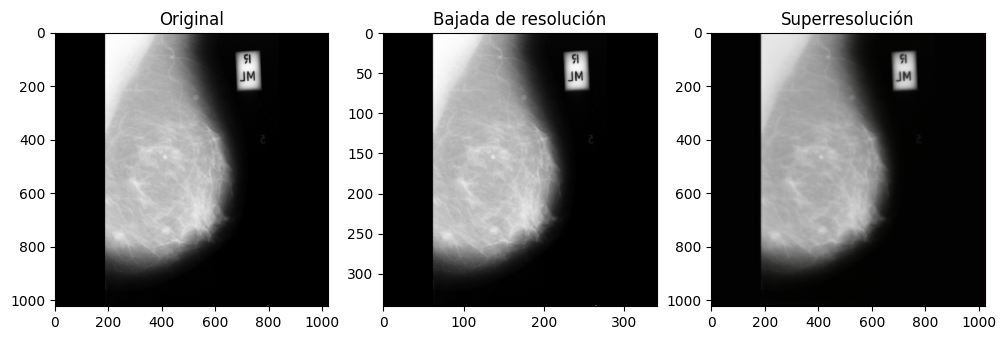

ValueError: Input images must have the same dimensions.

In [29]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

def load_pb_model(model_path):
    with tf.io.gfile.GFile(model_path, "rb") as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())
    session = tf.compat.v1.Session(graph=tf.Graph())
    with session.graph.as_default():
        tf.import_graph_def(graph_def, name="")
    return session

# Cargar el modelo EDSR x4
model_path = '/content/EDSR_Tensorflow/models/EDSR_x3.pb'
session = load_pb_model(model_path)

# Obtener el grafo y las operaciones de entrada y salida
graph = session.graph
input_tensor = graph.get_tensor_by_name("IteratorGetNext:0")
output_tensor = graph.get_tensor_by_name("NCHW_output:0")

# Directorio de imágenes
data_dir = "/content/mias/all-mias"

# Cargar imágenes
images = []
for file_name in os.listdir(data_dir):
    if file_name.endswith('.pgm'):
        img_path = os.path.join(data_dir, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        images.append(img)

# Normalización y preparación
images = np.array(images)
images = images.astype('float32') / 255.0

# Convertir imágenes en escala de grises a imágenes RGB
val_images = images[:10]
val_images_rgb = [np.stack((img,)*3, axis=-1) for img in val_images]

# Realizar la bajada de resolución
val_images_resized = [cv2.resize(img, (img.shape[1]//3, img.shape[0]//3)) for img in val_images_rgb]

# Convertir las imágenes a formato de tensor
val_images_resized = np.array(val_images_resized)

# Realizar la inferencia
predicted_images = []
for img in val_images_resized:
    img = np.expand_dims(img, axis=0)  # Añadir la dimensión de batch
    output_img = session.run(output_tensor, feed_dict={input_tensor: img})
    predicted_images.append(output_img[0])  # Quitar la dimensión de batch

# Visualizar las imágenes originales y mejoradas y calcular PSNR y SSIM
psnr_values = []
ssim_values = []

# Visualizar las imágenes originales y mejoradas
for i in range(5):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title('Original')
    plt.imshow(val_images[i], cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title('Bajada de resolución')
    plt.imshow(cv2.cvtColor(val_images_resized[i], cv2.COLOR_BGR2GRAY), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title('Superresolución')
    superres_img = np.transpose(predicted_images[i], (1, 2, 0))  # Reordenar dimensiones
    plt.imshow(superres_img, cmap='gray')
    #plt.imshow(cv2.cvtColor(predicted_images[i], cv2.COLOR_BGR2GRAY), cmap='gray')
    plt.show()

     # Calcular PSNR y SSIM
    original_img = (val_images[i] * 255).astype(np.uint8)
    superres_img_gray = cv2.cvtColor(superres_img, cv2.COLOR_BGR2GRAY)

    psnr_value = compare_psnr(original_img, superres_img_gray)
    ssim_value = compare_ssim(original_img, superres_img_gray)

    psnr_values.append(psnr_value)
    ssim_values.append(ssim_value)

    print(f'Imagen {i+1} - PSNR: {psnr_value:.2f}, SSIM: {ssim_value:.4f}')

# Mostrar los valores promedio de PSNR y SSIM
average_psnr = np.mean(psnr_values)
average_ssim = np.mean(ssim_values)
print(f'PSNR promedio: {average_psnr:.2f}, SSIM promedio: {average_ssim:.4f}')

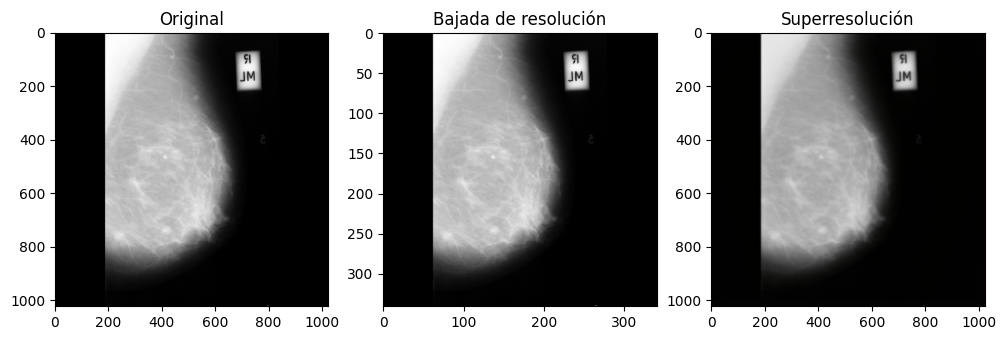

Imagen 1 - PSNR: 5.68, SSIM: 0.3579


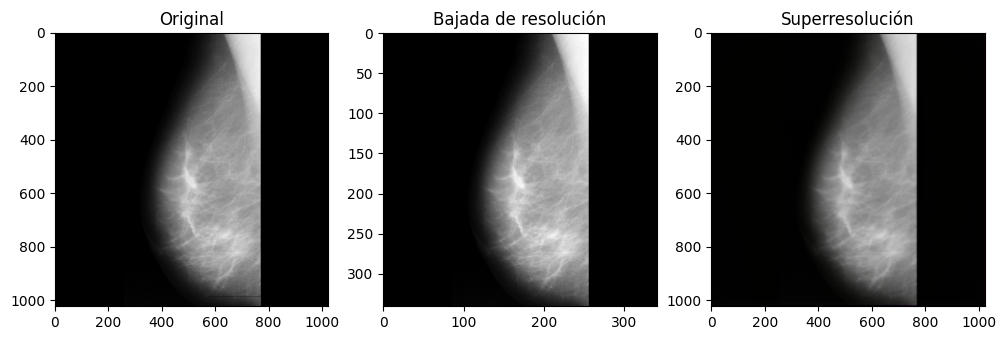

Imagen 2 - PSNR: 4.79, SSIM: 0.2966


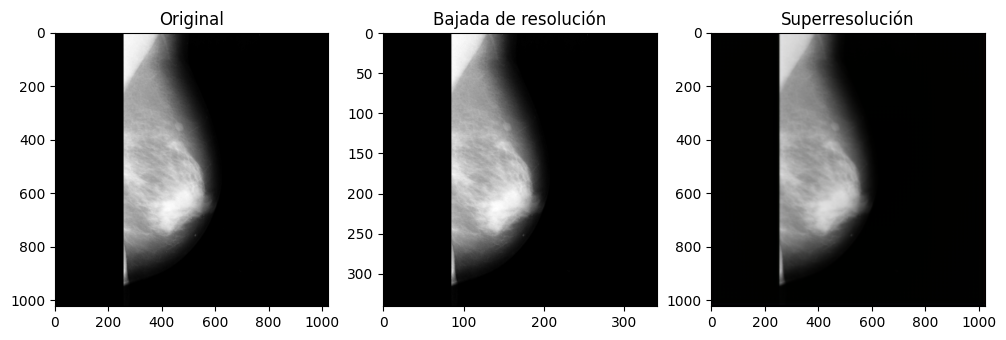

Imagen 3 - PSNR: 4.09, SSIM: 0.2165


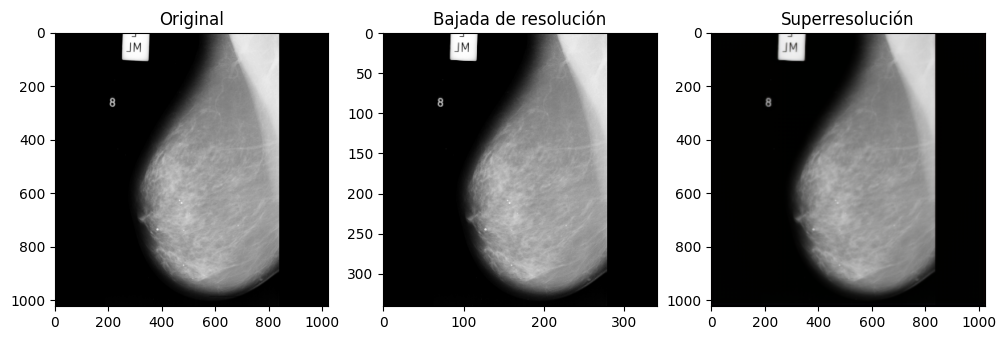

Imagen 4 - PSNR: 5.37, SSIM: 0.3601


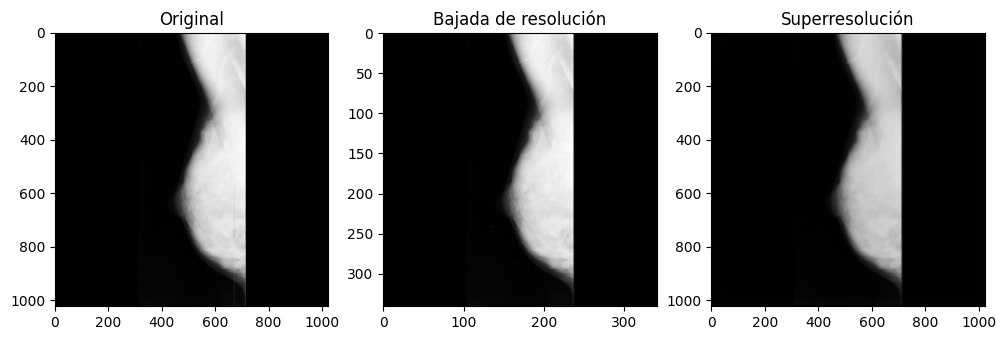

Imagen 5 - PSNR: 3.98, SSIM: 0.1624
PSNR promedio: 4.78, SSIM promedio: 0.2787


In [25]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity as compare_ssim

def load_pb_model(model_path):
    with tf.io.gfile.GFile(model_path, "rb") as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())
    session = tf.compat.v1.Session(graph=tf.Graph())
    with session.graph.as_default():
        tf.import_graph_def(graph_def, name="")
    return session

# Parámetros
scale_factor = 3  # Factor de escala para el modelo x3
model_path = '/content/EDSR_Tensorflow/models/EDSR_x3.pb'

# Cargar el modelo EDSR x3
session = load_pb_model(model_path)

# Obtener el grafo y las operaciones de entrada y salida
graph = session.graph
input_tensor = graph.get_tensor_by_name("IteratorGetNext:0")
output_tensor = graph.get_tensor_by_name("NCHW_output:0")

# Directorio de imágenes
data_dir = "/content/mias/all-mias"

# Cargar imágenes
images = []
for file_name in os.listdir(data_dir):
    if file_name.endswith('.pgm'):
        img_path = os.path.join(data_dir, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        images.append(img)

# Normalización y preparación
images = np.array(images)
images = images.astype('float32') / 255.0

# Convertir imágenes en escala de grises a imágenes RGB
val_images = images[:10]
val_images_rgb = [np.stack((img,)*3, axis=-1) for img in val_images]

# Realizar la bajada de resolución según el factor de escalado
val_images_resized = [cv2.resize(img, (img.shape[1]//scale_factor, img.shape[0]//scale_factor)) for img in val_images_rgb]

# Convertir las imágenes a formato de tensor
val_images_resized = np.array(val_images_resized)

# Realizar la inferencia
predicted_images = []
for img in val_images_resized:
    img = np.expand_dims(img, axis=0)  # Añadir la dimensión de batch
    output_img = session.run(output_tensor, feed_dict={input_tensor: img})
    predicted_images.append(output_img[0])  # Quitar la dimensión de batch

# Redimensionar las imágenes de superresolución a la resolución original
predicted_images_resized = [cv2.resize(np.transpose(img, (1, 2, 0)), (val_images[i].shape[1], val_images[i].shape[0])) for i, img in enumerate(predicted_images)]

# Visualizar las imágenes originales y mejoradas y calcular PSNR y SSIM
psnr_values = []
ssim_values = []

for i in range(5):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title('Original')
    plt.imshow(val_images[i], cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title('Bajada de resolución')
    plt.imshow(cv2.cvtColor(val_images_resized[i], cv2.COLOR_BGR2GRAY), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title('Superresolución')
    superres_img = predicted_images_resized[i]
    plt.imshow(superres_img, cmap='gray')
    plt.show()

    # Calcular PSNR y SSIM
    original_img = (val_images[i] * 255).astype(np.uint8)
    superres_img_gray = cv2.cvtColor((superres_img * 255).astype(np.uint8), cv2.COLOR_BGR2GRAY)

    psnr_value = compare_psnr(original_img, superres_img_gray)
    ssim_value = compare_ssim(original_img, superres_img_gray)

    psnr_values.append(psnr_value)
    ssim_values.append(ssim_value)

    print(f'Imagen {i+1} - PSNR: {psnr_value:.2f}, SSIM: {ssim_value:.4f}')

# Mostrar los valores promedio de PSNR y SSIM
average_psnr = np.mean(psnr_values)
average_ssim = np.mean(ssim_values)
print(f'PSNR promedio: {average_psnr:.2f}, SSIM promedio: {average_ssim:.4f}')


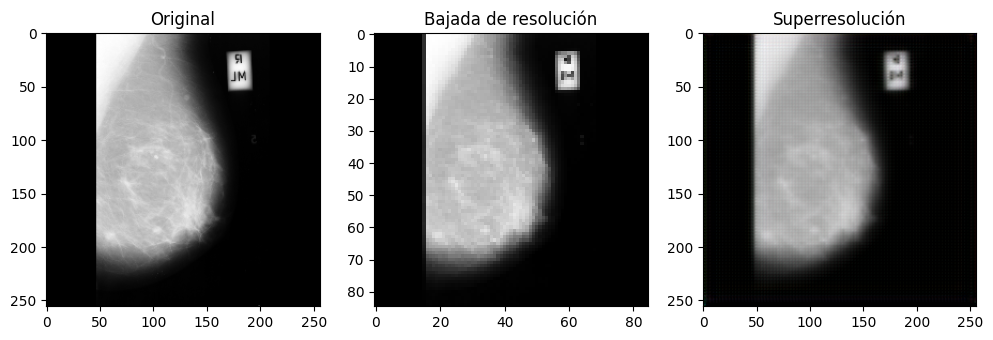

Imagen 1 - PSNR: 6.08, SSIM: 0.3563


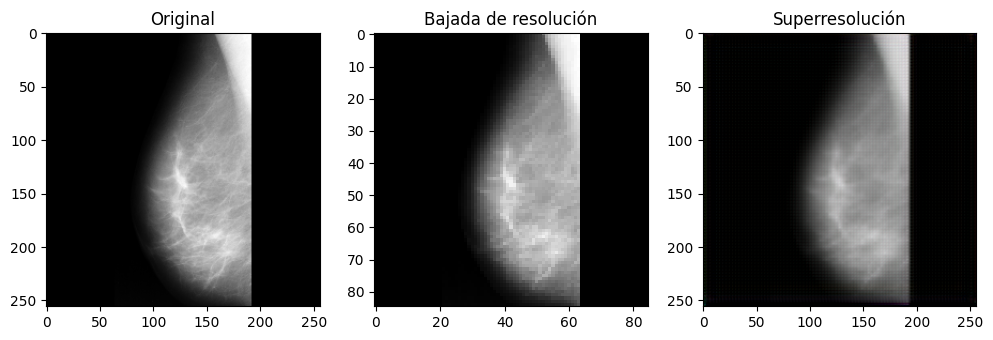

Imagen 2 - PSNR: 5.12, SSIM: 0.3013


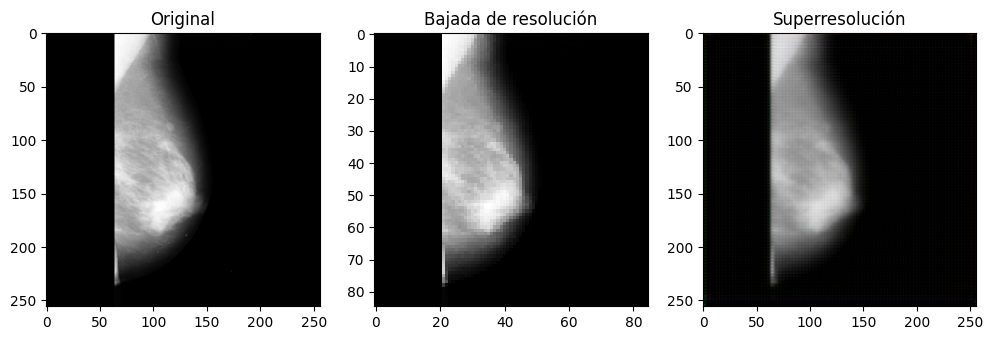

Imagen 3 - PSNR: 4.45, SSIM: 0.2233


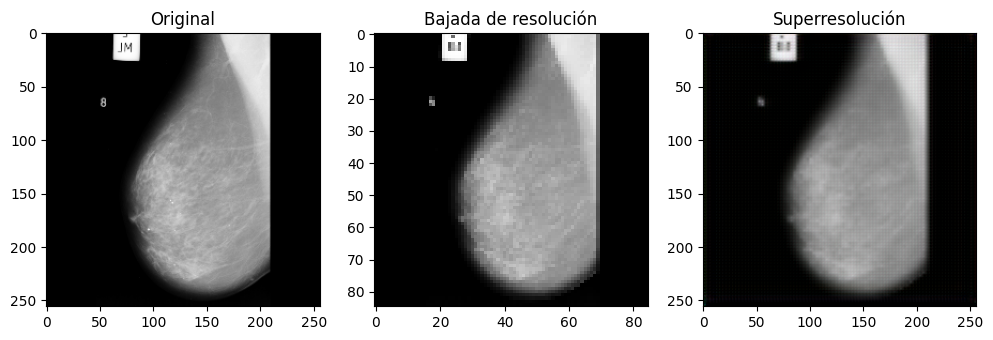

Imagen 4 - PSNR: 5.82, SSIM: 0.3557


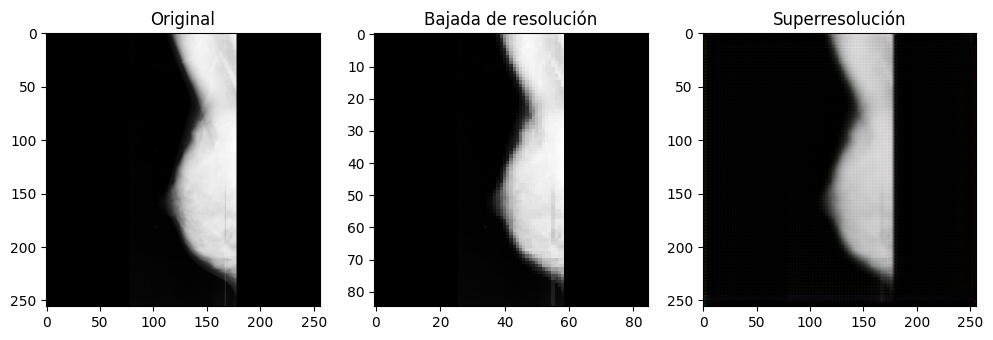

Imagen 5 - PSNR: 4.18, SSIM: 0.1685
PSNR promedio: 5.13, SSIM promedio: 0.2810


In [26]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity as compare_ssim

def load_pb_model(model_path):
    with tf.io.gfile.GFile(model_path, "rb") as f:
        graph_def = tf.compat.v1.GraphDef()
        graph_def.ParseFromString(f.read())
    session = tf.compat.v1.Session(graph=tf.Graph())
    with session.graph.as_default():
        tf.import_graph_def(graph_def, name="")
    return session

# Parámetros
scale_factor = 3  # Factor de escala para el modelo x3
model_path = '/content/EDSR_Tensorflow/models/EDSR_x3.pb'

# Cargar el modelo EDSR x3
session = load_pb_model(model_path)

# Obtener el grafo y las operaciones de entrada y salida
graph = session.graph
input_tensor = graph.get_tensor_by_name("IteratorGetNext:0")
output_tensor = graph.get_tensor_by_name("NCHW_output:0")

# Directorio de imágenes
data_dir = "/content/mias/all-mias"

# Cargar imágenes
images = []
for file_name in os.listdir(data_dir):
    if file_name.endswith('.pgm'):
        img_path = os.path.join(data_dir, file_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        images.append(img)

# Normalización y preparación
images = np.array(images)
images = images.astype('float32') / 255.0

# Ajustar las dimensiones de las imágenes al tamaño original del dataset
original_size = 256
val_images = [cv2.resize(img, (original_size, original_size)) for img in images[:10]]

# Convertir imágenes en escala de grises a imágenes RGB
val_images_rgb = [np.stack((img,)*3, axis=-1) for img in val_images]

# Realizar la bajada de resolución según el factor de escalado
low_res_size = original_size // scale_factor
val_images_resized = [cv2.resize(img, (low_res_size, low_res_size)) for img in val_images_rgb]

# Convertir las imágenes a formato de tensor
val_images_resized = np.array(val_images_resized)

# Realizar la inferencia
predicted_images = []
for img in val_images_resized:
    img = np.expand_dims(img, axis=0)  # Añadir la dimensión de batch
    output_img = session.run(output_tensor, feed_dict={input_tensor: img})
    predicted_images.append(output_img[0])  # Quitar la dimensión de batch

# Redimensionar las imágenes de superresolución a la resolución original
predicted_images_resized = [cv2.resize(np.transpose(img, (1, 2, 0)), (original_size, original_size)) for img in predicted_images]

# Visualizar las imágenes originales y mejoradas y calcular PSNR y SSIM
psnr_values = []
ssim_values = []

for i in range(5):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title('Original')
    plt.imshow(val_images[i], cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title('Bajada de resolución')
    plt.imshow(cv2.cvtColor(val_images_resized[i], cv2.COLOR_BGR2GRAY), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title('Superresolución')
    superres_img = predicted_images_resized[i]
    plt.imshow(superres_img, cmap='gray')
    plt.show()

    # Calcular PSNR y SSIM
    original_img = (val_images[i] * 255).astype(np.uint8)
    superres_img_gray = cv2.cvtColor((superres_img * 255).astype(np.uint8), cv2.COLOR_BGR2GRAY)

    psnr_value = compare_psnr(original_img, superres_img_gray)
    ssim_value = compare_ssim(original_img, superres_img_gray)

    psnr_values.append(psnr_value)
    ssim_values.append(ssim_value)

    print(f'Imagen {i+1} - PSNR: {psnr_value:.2f}, SSIM: {ssim_value:.4f}')

# Mostrar los valores promedio de PSNR y SSIM
average_psnr = np.mean(psnr_values)
average_ssim = np.mean(ssim_values)
print(f'PSNR promedio: {average_psnr:.2f}, SSIM promedio: {average_ssim:.4f}')